In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [1]:
import torch
import torchvision
import torchvision.models as models
from PIL import Image, ImageFile
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import gc; gc.enable()
import pandas as pd
from torch.utils.data import Dataset
import tensorflow as tf
from tensorflow import keras
from torchvision import transforms

In [2]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
# keras imports
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.applications.xception import Xception, preprocess_input
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Input
# other imports
from sklearn.preprocessing import LabelEncoder
import numpy as np
import glob
import cv2
import h5py
import os
import json
import datetime
import time

Using TensorFlow backend.


AttributeError: module 'keras_applications' has no attribute 'set_keras_submodules'

In [11]:
train_dir = '/Users/flatironschool/Documents/Kaggle/Kaggle-DR-detection/data/train/'



In [4]:
from keras.layers import Dense
#instantiate pre-trained ResNet model
res_fifty = keras.applications.ResNet50(include_top=False, weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.


/Users/flatironschool/.local/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [6]:
input_shape = res_fifty.output_shape
out = res_fifty.output
out = keras.layers.GlobalAveragePooling2D()(out)
out = keras.layers.Dense(512, activation='relu')(out)
out = keras.layers.Dense(512, activation='relu')(out)
total_classes = 5
predictions = keras.layers.Dense(total_classes, activation='softmax')(out)

model = keras.models.Model(inputs=res_fifty.input, outputs=predictions)

In [7]:
p = 179*0.85
cnt = 0
set_trainable = False
for layer in model.layers:
    if cnt>p:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
    cnt+=1

In [8]:
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in model.layers]
df_layers = pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])
df_layers

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x149fcf2b0>,input_1,False
1,<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x149fcf5c0>,conv1_pad,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x110c2c2b0>,conv1,False
3,<tensorflow.python.keras.layers.normalization.BatchNormalizationV1 object at 0x111b7ce80>,bn_conv1,False
4,<tensorflow.python.keras.layers.core.Activation object at 0x149fcfba8>,activation,False
5,<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x14a0812b0>,pool1_pad,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x14a081208>,max_pooling2d,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x14a081278>,res2a_branch2a,False
8,<tensorflow.python.keras.layers.normalization.BatchNormalizationV1 object at 0x14a1514e0>,bn2a_branch2a,False
9,<tensorflow.python.keras.layers.core.Activation object at 0x14a151e80>,activation_1,False


In [15]:
datagen = keras.preprocessing.image.ImageDataGenerator()
train_generator = datagen.flow_from_directory(train_dir, target_size = (224,224), classes = ['0','1','2','3','4'],class_mode ='categorical') 
batch_size = 32
train_steps_per_epoch = len(os.listdir(train_dir))//batch_size
adm = tf.keras.optimizers.Adam(lr = 0.01)
model.compile(optimizer = adm, loss = 'categorical_crossentropy')
history = model.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch,
                              epochs=15, verbose=1)

Found 21972 images belonging to 5 classes.
Epoch 1/15
687/687 [==============================] - 4505s 7s/step - loss: 8.1734
Epoch 2/15
687/687 [==============================] - 4508s 7s/step - loss: 8.1734
Epoch 3/15
687/687 [==============================] - 4497s 7s/step - loss: 8.1717
Epoch 4/15
687/687 [==============================] - 4504s 7s/step - loss: 8.1734
Epoch 5/15
687/687 [==============================] - 4493s 7s/step - loss: 8.1739
Epoch 6/15
687/687 [==============================] - 4505s 7s/step - loss: 8.1717
Epoch 7/15
687/687 [==============================] - 4508s 7s/step - loss: 8.1739
Epoch 8/15
687/687 [==============================] - 4510s 7s/step - loss: 8.1734
Epoch 9/15
687/687 [==============================] - 6578s 10s/step - loss: 8.1725
Epoch 10/15
687/687 [==============================] - 6276s 9s/step - loss: 8.1743
Epoch 11/15
687/687 [==============================] - 5195s 8s/step - loss: 8.1730
Epoch 12/15
687/687 [====================

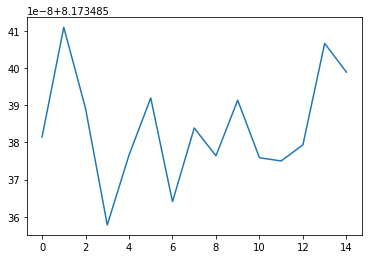

In [16]:
plt.plot(history.history['loss'])
plt.savefig('loss_resnet50_20190830')